In [1]:
#Nama : Adifa Syahira
#Nim  : 1103202067
#Kelas: TK 44-G4

#Mengimport Fungsi Library

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Data
df = pd.read_csv("D:\KULIAH DIFA\Semester 7 HUHU\Machine Learning\Minggu 5\Cuisine_rating.csv")

In [3]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [4]:
#Mendapatkan rentang baris dan kolom
df.shape

(200, 15)

In [5]:
#Mendapatkan informasi tentang tipe data dan nilai kolom yang bukan nol dalam kumpulan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [6]:
#Mendapatkan informasi kolom numerik tentang hitungan, mean, median, modus, deviasi standar, min, maks, 25%, 50%, 75% dalam suatu dataset
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#Getng information about  null values of columns in a dataset
df.isna().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [9]:
#Hanya mendapatkan kolom numerik di dataset
num=df.select_dtypes(exclude=object)

In [11]:
#Mendapatkan informasi tentang outlier kolom dalam kumpulan data
def Find_Outliers(df):
    """
    Method Name: Find_Outliers
    Description: This is a outliers finding method.we will calculate the outlier data points using the statistical
                 method called interquartile range (IQR).Here we check whter outliers are within range of Q1(25% of data)
                 and Q2(75% of data) and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 
    Output: number of outliers in dataset
    On Failure: Raise Exception
    Written By: Atharva Kadam
    Version: 1.0
    Revisions: None
    """
    for i in num:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        l1=q1 - (IQR * 1.5)
        l2=q3 + (IQR * 1.5)
        l3=df[i]<=l1
        l4=df[i]>=l2
        outliers = df[((df[i]<(l1)) | (df[i]>(l2)))]
        return outliers

outliers = Find_Outliers(df)
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 0
max outlier value: User ID           NaN
Area code         NaN
Location          NaN
Gender            NaN
YOB               NaN
Marital Status    NaN
Activity          NaN
Budget            NaN
Cuisines          NaN
Alcohol           NaN
Smoker            NaN
Food Rating       NaN
Service Rating    NaN
Overall Rating    NaN
Often A S         NaN
dtype: object
min outlier value: User ID           NaN
Area code         NaN
Location          NaN
Gender            NaN
YOB               NaN
Marital Status    NaN
Activity          NaN
Budget            NaN
Cuisines          NaN
Alcohol           NaN
Smoker            NaN
Food Rating       NaN
Service Rating    NaN
Overall Rating    NaN
Often A S         NaN
dtype: object


In [13]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [14]:
#Mendapatkan informasi tentang gender, status militer, dan penggunaan kelompok berdasarkan Anggaran, Aktivitas dalam kumpulan data
gender_martial_activity=df.groupby(["Gender","Marital Status"])["Activity"].count()
gender_martial_activity

Gender  Marital Status
Female  Divorced           6
        Married           36
        Single            40
Male    Divorced           8
        Married           50
        Single            60
Name: Activity, dtype: int64

In [15]:
#Mendapatkan informasi tentang Masakan dan anggaran menggunakan pengelompokan berdasarkan Anggaran, Masakan dalam kumpulan data
budget_cuisine=df.groupby(["Cuisines"])["Budget"].sum()
budget_cuisine

Cuisines
Chinese      98
Filipino    126
French      134
Indian      109
Italian      70
Japanese    148
Seafood      78
Name: Budget, dtype: int64

In [16]:
#Mendapatkan informasi tentang Masakan oleh pelajar dan profesional menggunakan grup pada Aktivitas, Masakan, dan USEID dalam kumpulan data
activity_cuisine=df.groupby(["Activity","Cuisines"])["User ID"].count()
activity_cuisine

Activity      Cuisines
Professional  Chinese      8
              Filipino    14
              French      16
              Indian      18
              Italian      6
              Japanese    12
              Seafood      6
Student       Chinese     16
              Filipino    20
              French      18
              Indian      14
              Italian     12
              Japanese    24
              Seafood     16
Name: User ID, dtype: int64

In [17]:
#mendapatkan informasi tentang Konsumsi Alkohol oleh pria dan wanita menggunakan kelompok berdasarkan ALCOHOL, GENDER dan USERID dalam sebuah dataset
drink_ratio=df.groupby(["Alcohol ","Gender"])["User ID"].count()
drink_ratio

Alcohol   Gender
Never     Female    40
          Male      48
Often     Female    25
          Male      36
Socially  Female    17
          Male      34
Name: User ID, dtype: int64

In [18]:
#mengumpulkan informasi tentang perokok berdasarkan laki-laki dan perempuan menggunakan kelompok berdasarkan SMOKER, GENDER dan USERID dalam sebuah dataset
smoker_ratio=df.groupby(["Smoker","Gender"])["User ID"].count()
smoker_ratio

Smoker    Gender
Never     Female    20
          Male      39
Often     Female    28
          Male      42
Socially  Female    34
          Male      37
Name: User ID, dtype: int64

In [19]:
#Mendapatkan informasi tentang Masakan dan peringkat makanannya menggunakan grup berdasarkan MASAKAN dan PERINGKAT MAKANAN dalam kumpulan data
cuisins_rating=df.groupby(["Cuisines"])["Food Rating"].sum()
cuisins_rating

Cuisines
Chinese      83
Filipino     92
French      112
Indian       89
Italian      58
Japanese    139
Seafood      71
Name: Food Rating, dtype: int64

for User ID (array([], dtype=int64),)
for Area code (array([], dtype=int64),)
for YOB (array([], dtype=int64),)
for Budget (array([], dtype=int64),)
for Food Rating (array([], dtype=int64),)
for Service Rating (array([], dtype=int64),)
for Overall Rating (array([], dtype=int64),)


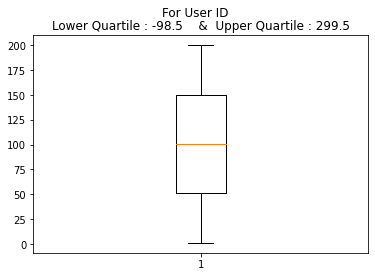

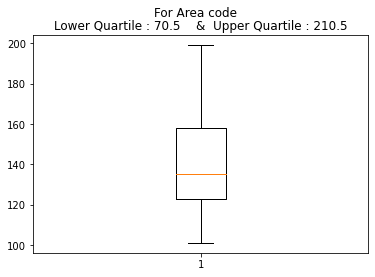

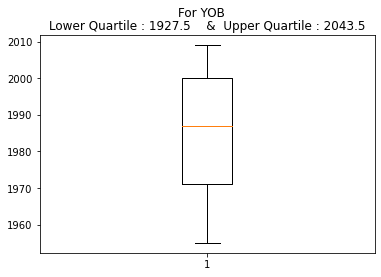

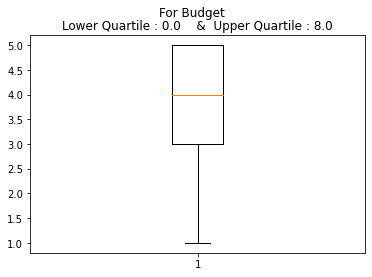

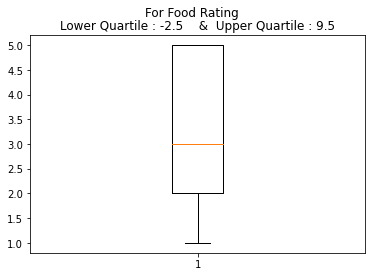

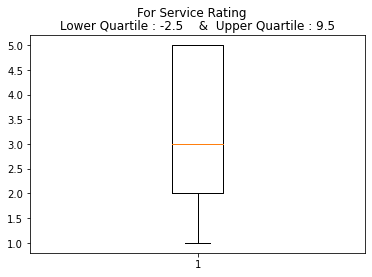

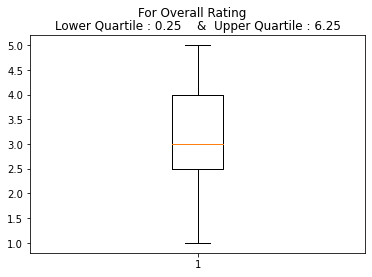

In [24]:
#Merencanakan informasi tentang outlier melalui plot kotakMendapatkan informasi tentang outlier kolom dalam kumpulan data
def Find_Outliers(df):
     for i in num:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        l1=q1 - (IQR * 1.5)
        l2=q3 + (IQR * 1.5)
        l3=df[i]<=l1
        l4=df[i]>=l2
        outliers = df[((df[i]<(l1)) | (df[i]>(l2)))]
        plt.figure()
        plt.boxplot(df[i])
        plt.title(f"Lower Quartile : {l1}    &  Upper Quartile : {l2}")
        plt.suptitle(f"For {i}")
        print(f"for {i}",np.where(l3) and np.where(l4))
        
    
Find_Outliers(df)

In [25]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


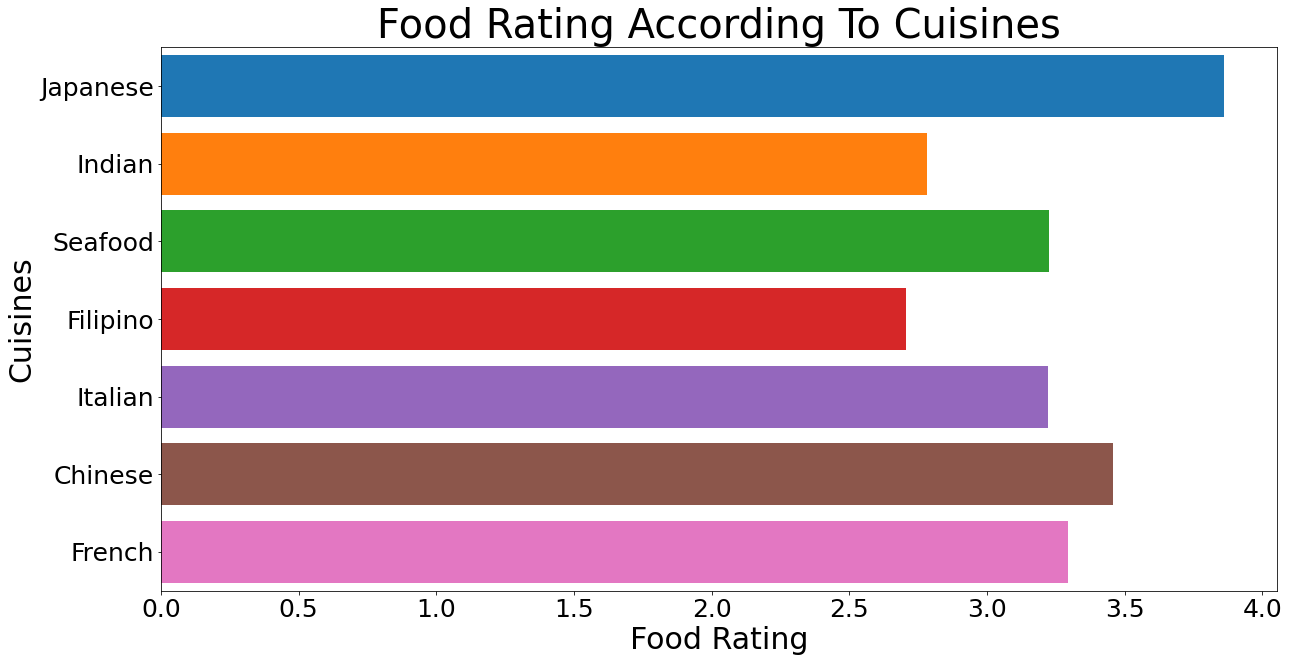

In [28]:
#Merencanakan plot bar masakan dan peringkat makanan dari kumpulan data
def plot_bar(df,x_axis,y_axis):
    sns.barplot(y=df[y_axis],x=df[x_axis],ci=0,saturation=5.5)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(x_axis,fontsize=30)
    plt.ylabel(y_axis,fontsize=30)
    plt.title("Food Rating According To Cuisines",fontsize = 40)

fig = plt.figure(figsize=(20,10))
plot_bar(df,'Food Rating','Cuisines')




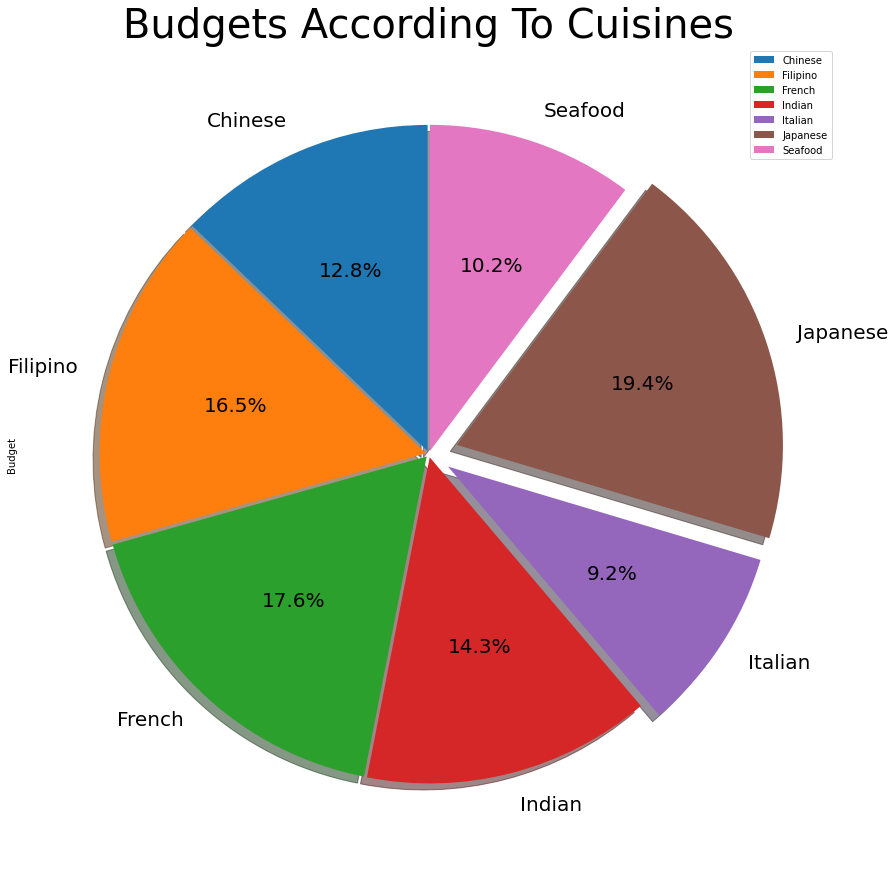

In [29]:
#Merencanakan pie plot masakan dan anggarannya
def pie_chart(df,x_axis):
    fig = plt.figure(figsize=(30,15))
    budget_cuisine.plot(kind='pie',rot=90,explode=(0.01,0.01,0.01,0.01,0.07,0.09,0.01),startangle = 90,shadow = True,autopct='%1.1f%%', textprops={'fontsize': 20})
    plt.legend()
    plt.title("Budgets According To Cuisines",fontsize = 40)
    
pie_chart(df,'budget_cuisine')


Text(0.5, 1.0, 'Subplot-2\nConsumption of Alcohol according \nto Gender and Martial status')

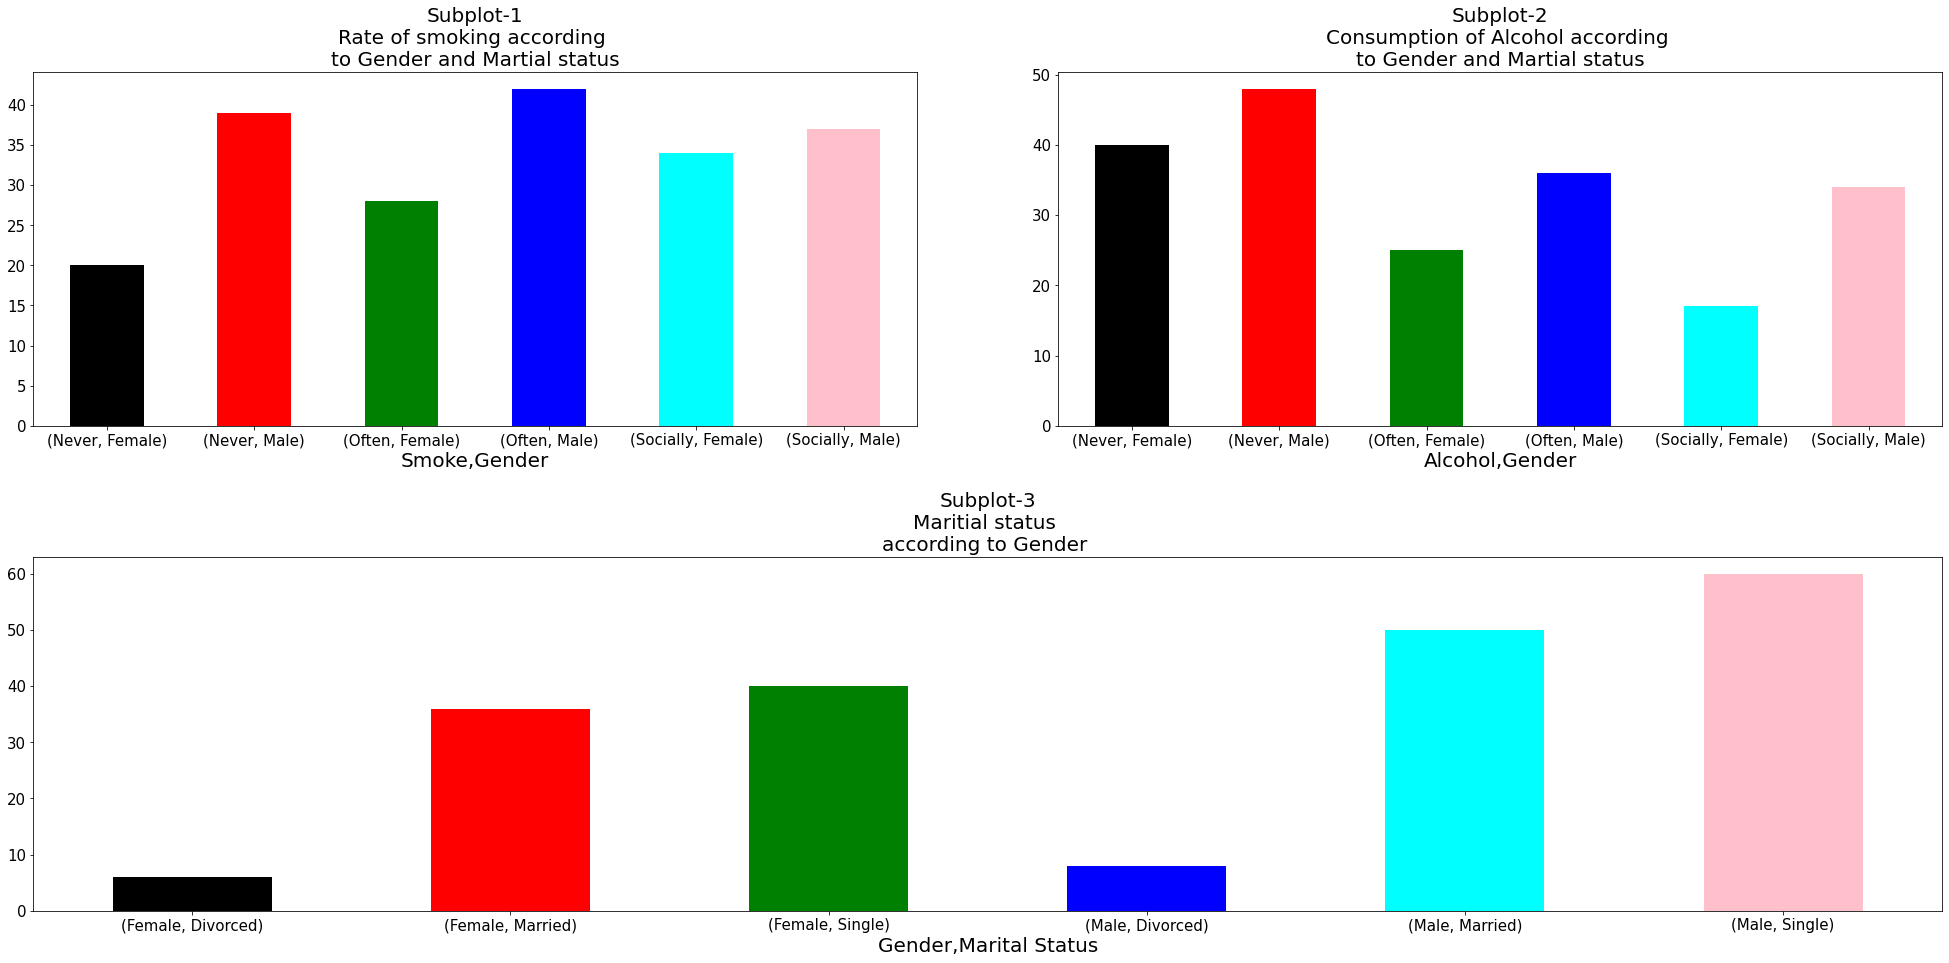

In [30]:
#Membuat plot subplot rasio minuman dan asap pada pria dan wanita
fig, axs = plt.subplots(2, 2, figsize=(30, 15))
fig.tight_layout()
fig.tight_layout(pad=11.0)

plt.subplot(2,1,2)
gender_martial_activity.plot(kind='bar',rot=0,color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Gender,Marital Status',fontsize=20)
plt.title("Subplot-3\nMaritial status \naccording to Gender ",fontsize = 20)



plt.subplot(2,2,1)
smoker_ratio.plot(kind='bar',rot=0,color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Smoke,Gender',fontsize=20)
plt.title("Subplot-1\nRate of smoking according \nto Gender and Martial status",fontsize = 20)



plt.subplot(2,2,2)
drink_ratio.plot(kind='bar',rot=0,color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Alcohol,Gender',fontsize=20)
plt.title("Subplot-2\nConsumption of Alcohol according \nto Gender and Martial status",fontsize = 20)

Text(0.5, 1.0, 'Correlation plot')

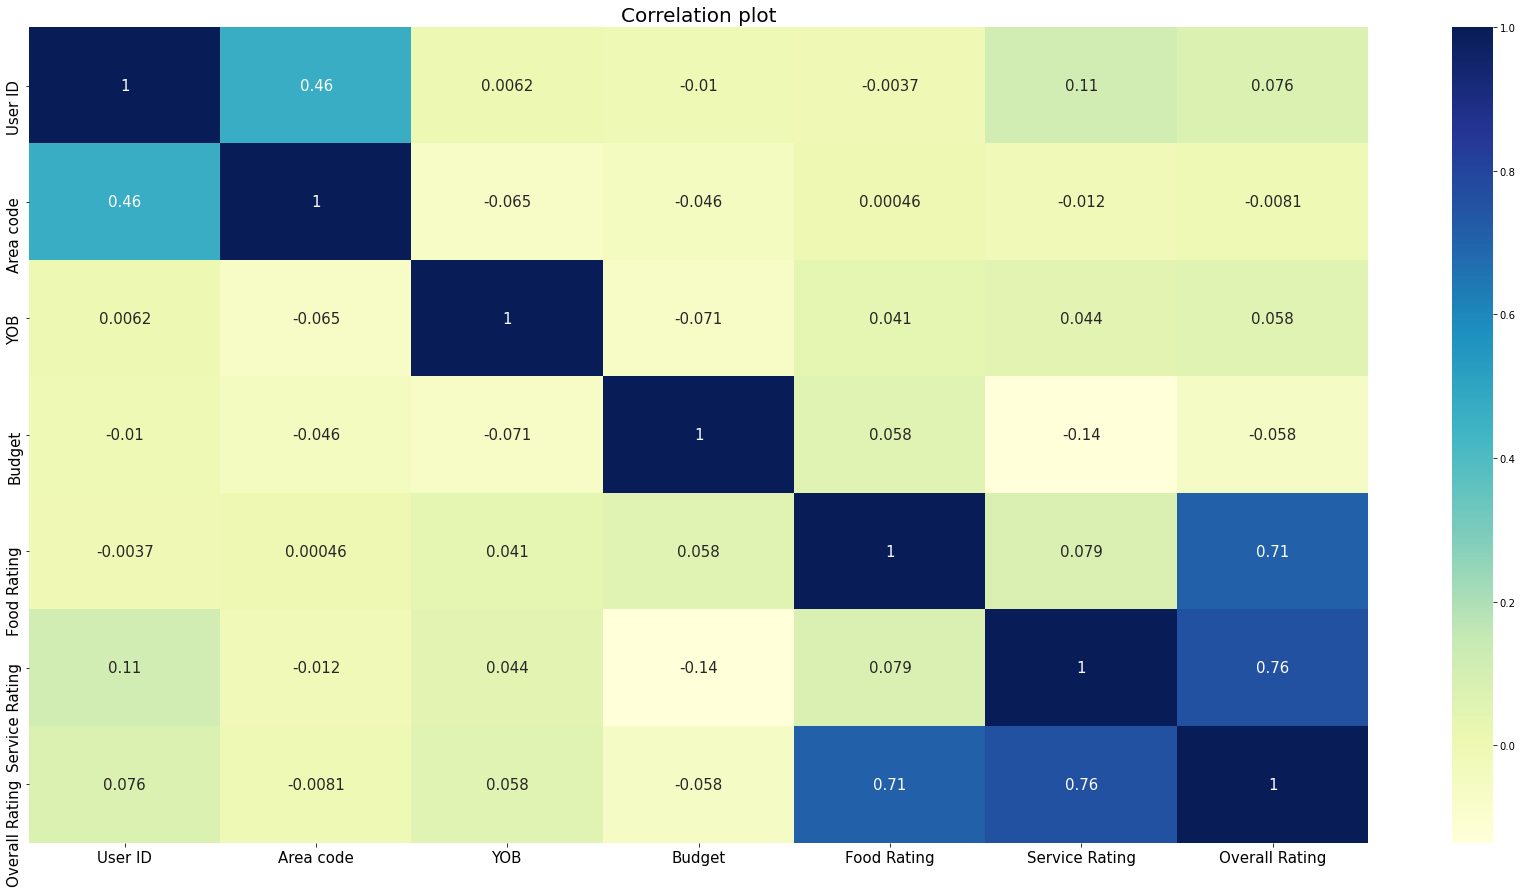

In [31]:
#Plot korelasi memberi kita informasi tentang istilah-istilah yang berkorelasi satu sama lain"
fig = plt.figure(figsize=(30,15))
df.corr()
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,  annot_kws={'size': 15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation plot",fontsize = 20)
